# Pyber HW Observations

The following observations were made from the Pyber data set:
*  The number of drivers in the the city types drove the average pricing of rides. Urban areas had the most drivers available, and thus had the lowest average fares, where as rural drivers had the lowest amount of drivers and consequently higher avg costs per ride. 
* 80% of all drivers are located in the Urban areas, with less than 7% of drivers being located in rural areas. 
* The average fare for urban riders never rose above $\$$30.00, while a majority of the suburban and rural cities had average fares above $\$$30.00 dollars. 
* Consequently, although suburban and rural drivers only make up around 20% of all Pyber drivers, they still account for a combined 37.3% of all total fares.
* Thus, the rural and suburban areas are still a profitable sector for the amount they can bring in per driver.


In [33]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
#city_data.head()
ride_data = pd.read_csv(ride_data_to_load)
#ride_data.head()
# Combine the data into a single dataset

merged_data = pd.merge(city_data, ride_data, on="city", how="outer")

#Data Details to note anything that might be off or have bad values
merged_data.describe(include="all")


,city,driver_count,type,date,fare,ride_id
count,2375,2375.000000,2375,2375,2375.000000,2.375000e+03
unique,120,NaN,3,2375,NaN,NaN
top,West Angela,NaN,Urban,2018-01-17 10:15:36,NaN,NaN
freq,39,NaN,1625,1,NaN,NaN
mean,NaN,28.930105,NaN,NaN,26.753112,4.887270e+12
std,NaN,20.666306,NaN,NaN,12.109465,2.907361e+12
min,NaN,1.000000,NaN,NaN,4.050000,3.218337e+08
25%,NaN,11.000000,NaN,NaN,17.190000,2.381175e+12
50%,NaN,23.000000,NaN,NaN,26.600000,4.748541e+12
75%,NaN,45.000000,NaN,NaN,36.645000,7.461936e+12


In [34]:
#verify that the the columns are the right data type
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
driver_count    2375 non-null int64
type            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [35]:
# Display the data table for preview
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [36]:
#urban new method, create a dataframe from the merged data filtered by type = "Urban"
urban = merged_data[merged_data["type"] == "Urban"]

#create a new dataframe that takes urban df and groups by city, and adds Avg Fare, Total Rides, Total Drivers
urban_cities = pd.DataFrame({"Avg Fare":urban.groupby("city")["fare"].mean(), 
                          "Total Rides": urban.groupby("city")["ride_id"].count(),
                         "Total Drivers": urban.groupby("city")["driver_count"].mean()})
#Test Urban Df
urban_cities.head()

#Rural Cities filter, create a dataframe from the merged data filtered by type = "Rural"
rural = merged_data[merged_data["type"] == "Rural"]

#create a new dataframe that takes rural df and groups by city, and adds Avg Fare, Total Rides, Total Drivers
rural_cities = pd.DataFrame({"Avg Fare":rural.groupby("city")["fare"].mean(), 
                          "Total Rides": rural.groupby("city")["ride_id"].count(),
                         "Total Drivers": rural.groupby("city")["driver_count"].mean()})
#Test Rural Df
rural_cities.head()
#Suburban Cities, create a dataframe from the merged data filtered by type = "Suburban"

suburban = merged_data[merged_data["type"] == "Suburban"]

#create a new dataframe that takes suburban df and groups by city, and adds Avg Fare, Total Rides, Total Drivers
suburban_cities = pd.DataFrame({"Avg Fare":suburban.groupby("city")["fare"].mean(), 
                          "Total Rides": suburban.groupby("city")["ride_id"].count(),
                         "Total Drivers": suburban.groupby("city")["driver_count"].mean()})
#Test Suburban df
suburban_cities.head()

#city_data.head()


,Avg Fare,Total Rides,Total Drivers
city,,,
Barronchester,36.422500,16,11
Bethanyland,32.956111,18,22
Brandonfort,35.437368,19,10
Colemanland,30.894545,22,23
Davidfurt,31.995882,17,23


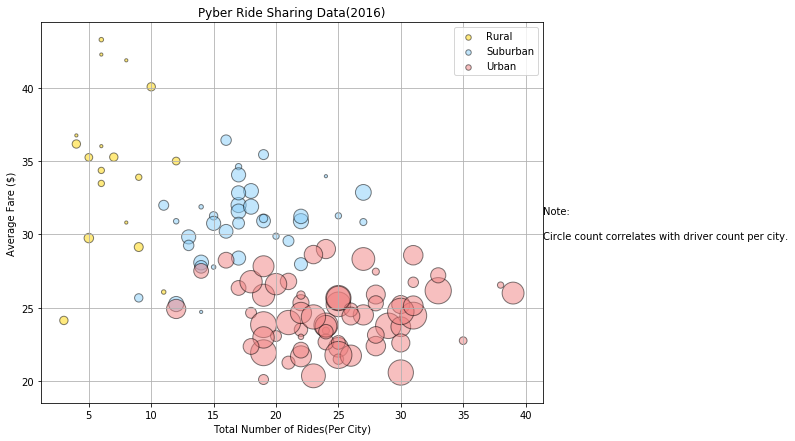

In [37]:
# Build the scatter plots for each city types
# To plot multiple column groups in a single axes, repeat plot method specifying target ax
# Looked up HTML color codes
ax = rural_cities.plot.scatter(x="Total Rides", y='Avg Fare', s= rural_cities["Total Drivers"]*10, grid=True, 
                               alpha=0.5, color='Gold', edgecolors ='black', label='Rural', figsize= [9,7])
plt.plot()

#Add suburban cities df to existing df, matching ax. 
#Talk to instructors for the need to reset the index and how ax works. 
suburban_cities.plot.scatter(x="Total Rides", y='Avg Fare', s= suburban_cities["Total Drivers"]*10, color='LightSkyBlue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='Suburban',ax=ax)
#Repeat above process
urban_cities.plot.scatter(x="Total Rides", y='Avg Fare', s= urban_cities["Total Drivers"]*10, color='LightCoral', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='Urban', ax=ax)
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")

#legend was added automatically, but due to the markers being effected by size, found the below code to make sure all markers in
#legend are matching
lgnd = plt.legend(loc="best", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
#plt.tight_layout()
plt.figtext(0.9,.5,"Note:")
plt.figtext(0.9,.45,"Circle count correlates with driver count per city.")
#plt.tight_layout()
#need to save figure
plt.savefig("../Images/Pyber Ride Sharing Bubble Plot.png",bbox_inches='tight')
plt.show()

## Total Fares by City Type

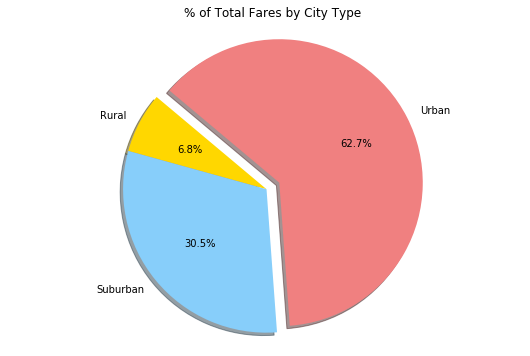

In [38]:
# Calculate Type Percents
#create new dataframe from original merged_data, by grouping by type, and creating a column that counts the "fare" column values
total_fares_types = merged_data.groupby(["type"])[["fare"]].sum()

#rename column, created a percent of total just as a double check to our work. Not necessary 
#using total_fares_types df as the basis for our pie charts

total_fares_types = total_fares_types.rename(columns={"fare": "Total Fares"})
total_fares_types["Percent of Total Fares"] = round((total_fares_types["Total Fares"]/total_fares_types["Total Fares"].sum())*100,2)
total_fares_types["Total Rides"] = merged_data.groupby("type").ride_id.count()
#Total Drivers code below gives incorrect data
#total_fares_types["Total Drivers"] = merged_data.groupby(["type"]).driver_count.sum()
total_fares_types.head()

# Explode list creates separation for the urban data, and colors list is the same colors from our bubble chart
explode = [0,0,0.1]
colors = ["Gold", "LightSkyBlue", "LightCoral"]

#Create new pie chart
total_fares_types.plot.pie(y="Total Fares",autopct="%1.1f%%",colors=colors, title= "% of Total Fares by City Type", legend=False
                           , startangle=140, explode=explode, figsize=[9,6], shadow=True)
#ensures we have a perfect circle
plt.axis("equal")

#remove the y-axis from showing
plt.axis('off')

# Save Figure
plt.savefig("../Images/Percent_By_City_Type.png")

plt.show()


## Total Rides by City Type

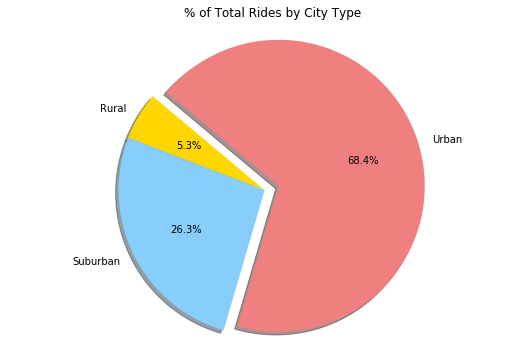

In [39]:

# Build Pie Chart
total_fares_types.plot.pie(y="Total Rides",autopct="%1.1f%%",colors=colors, title= "% of Total Rides by City Type", legend=False
                          , startangle=140, explode=explode, figsize=[9,6], shadow=True)
#ensures we have a perfect circle
plt.axis("equal")

#remove the y-axis from showing
plt.axis('off')

#Save Figure
plt.savefig("../Images/Percent of Total Rides by City Type.png")


In [40]:
# Show Figure
plt.show()

## Total Drivers by City Type

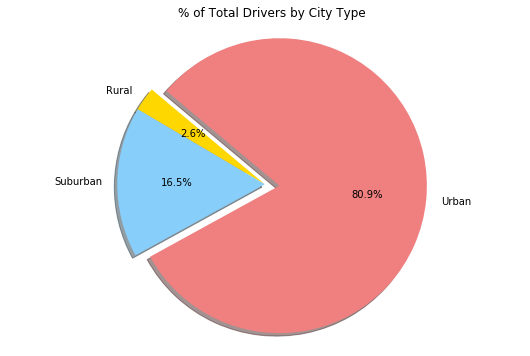

In [41]:
# Calculate Driver Percents
rural_drivers = rural_cities["Total Drivers"].sum()
suburban_drivers = suburban_cities["Total Drivers"].sum()
urban_drivers =  urban_cities["Total Drivers"].sum()

total_drivers_df = pd.DataFrame({"Total Drivers": {"Rural":rural_drivers, "Suburban":suburban_drivers,"Urban":urban_drivers}})
total_drivers_df

#Create new pie chart
total_drivers_df.plot.pie(y="Total Drivers",autopct="%1.1f%%",colors=colors, title= "% of Total Drivers by City Type", legend=False
                           , startangle=140, explode=explode, figsize=[9,6], shadow=True)
#ensures we have a perfect circle
plt.axis("equal")
#remove the y-axis from showing
plt.axis('off')

# Save Figure
plt.savefig("../Images/Percent_Total_Drivers_CityType.png")

plt.show()